In [131]:
# Nama : Ahmad Rizki
# NIM : 18221071


# import library
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

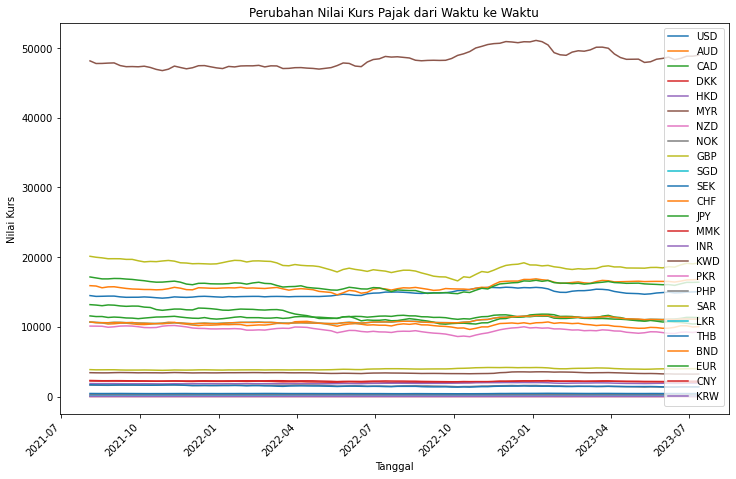

In [132]:
# Membaca data dari file JSON
with open('./../Data Scraping/data/kurs_pajak.json') as file:
    data = json.load(file)

# Mengubah data JSON menjadi DataFrame
rows = []
for item in data:
    doc_id = item['doc_id']
    start_date = item['start_date']
    end_date = item['end_date']
    for currency_data in item['data']:
        row_id = currency_data['row_id']
        currency = currency_data['currency']
        currency_code = currency_data['currency_code']
        value = currency_data['value']
        change = currency_data['change']
        rows.append([doc_id, start_date, end_date, row_id, currency, currency_code, value, change])

df = pd.DataFrame(rows, columns=['doc_id', 'start_date', 'end_date', 'row_id', 'currency', 'currency_code', 'value', 'change'])
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Menampilkan visualisasi data tren perubahan nilai kurs pajak
fig, ax = plt.subplots(figsize=(12, 8))

for currency_code in df['currency_code'].unique():
    currency_df = df[df['currency_code'] == currency_code]
    currency_df = currency_df.set_index('start_date')
    currency_df['value'].plot(ax=ax, label=currency_code)

ax.set_xlabel('Tanggal')
ax.set_ylabel('Nilai Kurs')
ax.set_title('Perubahan Nilai Kurs Pajak dari Waktu ke Waktu')
ax.legend()

plt.xticks(rotation=45)
plt.show()

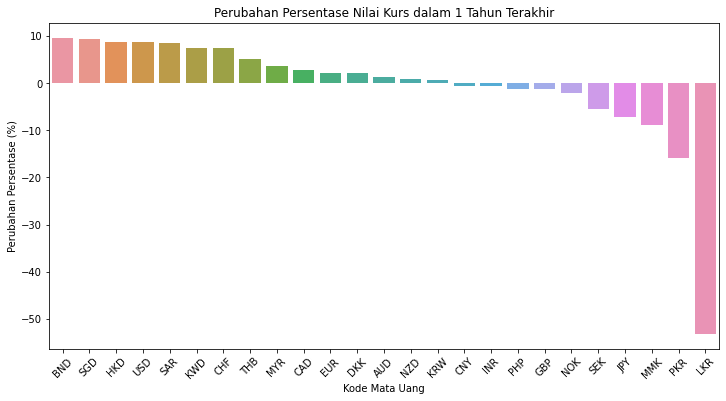

In [133]:
# Menghitung perubahan persentase nilai kurs dalam 1 tahun terakhir
df['start_year'] = df['start_date'].dt.year
df['change_percentage'] = df['change'] / df['value'] * 100
df_last_year = df[df['start_year'] == df['start_year'].max() - 1]
df_last_year = df_last_year.groupby('currency_code')['change_percentage'].sum().reset_index()

# Menampilkan visualisasi data perubahan persentase nilai kurs dalam 1 tahun terakhir
fig2, ax2 = plt.subplots(figsize=(12, 6))

df_last_year = df_last_year.sort_values('change_percentage', ascending=False)
sns.barplot(data=df_last_year, x='currency_code', y='change_percentage', ax=ax2)
ax2.set_xlabel('Kode Mata Uang')
ax2.set_ylabel('Perubahan Persentase (%)')
ax2.set_title('Perubahan Persentase Nilai Kurs dalam 1 Tahun Terakhir')

plt.xticks(rotation=45)
plt.show()

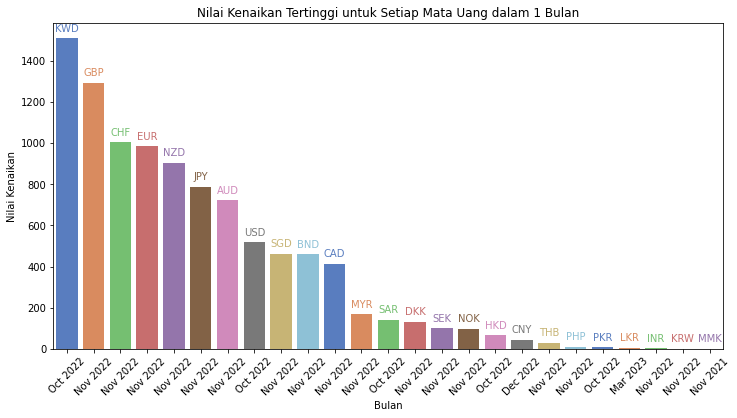

In [136]:
# Menghitung nilai kenaikan tertinggi untuk setiap mata uang
df['month'] = df['start_date'].dt.month
df['year_month'] = df['start_date'].dt.to_period('M')
df_monthly_change = df.groupby(['currency_code', 'year_month'])['change'].sum().reset_index()
df_monthly_change = df_monthly_change.sort_values('change', ascending=False)
df_monthly_change = df_monthly_change.drop_duplicates(subset='currency_code')

# Membuat palet warna sesuai dengan jumlah mata uang
color_palette = sns.color_palette('muted', n_colors=len(df_monthly_change))

# Membuat legenda dengan warna sesuai dengan warna bar
legend_labels = df_monthly_change['currency_code']

fig3, ax3 = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_monthly_change, x='currency_code', y='change', ax=ax3, palette=color_palette)
ax3.set_xlabel('Bulan')
ax3.set_ylabel('Nilai Kenaikan')
ax3.set_title('Nilai Kenaikan Tertinggi untuk Setiap Mata Uang dalam 1 Bulan')
ax3.set_xticklabels(df_monthly_change['year_month'].dt.strftime('%b %Y'), rotation=45)

# Menambahkan teks legenda di atas setiap bar
for bar, label in zip(ax3.patches, legend_labels):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax3.annotate(label, (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=bar.get_facecolor())

plt.show()


In [135]:
# Menampilkan bulan dengan nilai kenaikan tertinggi untuk setiap mata uang
for index, row in df_monthly_change.iterrows():
    currency_code = row['currency_code']
    year_month = row['year_month']
    change = row['change']
    print(f"Bulan dengan nilai kenaikan tertinggi untuk mata uang {currency_code}: {year_month}, dengan nilai kenaikan sebesar {change}")

Bulan dengan nilai kenaikan tertinggi untuk mata uang KWD: 2022-10, dengan nilai kenaikan sebesar 1508.7
Bulan dengan nilai kenaikan tertinggi untuk mata uang GBP: 2022-11, dengan nilai kenaikan sebesar 1291.42
Bulan dengan nilai kenaikan tertinggi untuk mata uang CHF: 2022-11, dengan nilai kenaikan sebesar 1003.43
Bulan dengan nilai kenaikan tertinggi untuk mata uang EUR: 2022-11, dengan nilai kenaikan sebesar 983.49
Bulan dengan nilai kenaikan tertinggi untuk mata uang NZD: 2022-11, dengan nilai kenaikan sebesar 905.21
Bulan dengan nilai kenaikan tertinggi untuk mata uang JPY: 2022-11, dengan nilai kenaikan sebesar 788.2
Bulan dengan nilai kenaikan tertinggi untuk mata uang AUD: 2022-11, dengan nilai kenaikan sebesar 720.75
Bulan dengan nilai kenaikan tertinggi untuk mata uang USD: 2022-10, dengan nilai kenaikan sebesar 519.0
Bulan dengan nilai kenaikan tertinggi untuk mata uang SGD: 2022-11, dengan nilai kenaikan sebesar 462.49
Bulan dengan nilai kenaikan tertinggi untuk mata uang B